In [2]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
!nvidia-smi

Thu Sep 28 13:47:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8               8W /  60W |     10MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
#how to get datasets? 
#we are using the food121 dataset starts with 101 diffrent classes of food and 1000 images per class 25% testing
# our datasets start ith 3 classes of food and only 10% of the images (-75 training )
#start with a small scale them incraese the scale wwhen necessary
#increase and speedup how fast we can experiment
import requests
import zipfile
from pathlib import Path

data_path = Path("dataset/")
image_path = data_path / "pizza_steak_sushi"

#if image folder doesnt exsist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} doesnt not exist creating one")
    image_path.mkdir(parents=True,
                     exist_ok=True)
#download pizza_steak_sushi dataset
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading dataset")
    f.write(request.content)
    
#unzip pizza, steak,, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping pizza, steakd and sushi data...")
    zip_ref.extractall(image_path)

dataset/pizza_steak_sushi directory already exists... skipping download
downloading dataset
unzipping pizza, steakd and sushi data...


## data preprocessing (data prep nd adata exploratino)

In [5]:
import os
def walk_through_dir(dir_path):
    """_summary_
    walks thorugh dir_path returning its contents.
    Args:
        dir_path (POSIX_PATH): _description_
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f" there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

 there are 2 directories and 0 images in 'dataset/pizza_steak_sushi'.
 there are 3 directories and 0 images in 'dataset/pizza_steak_sushi/train'.
 there are 0 directories and 72 images in 'dataset/pizza_steak_sushi/train/sushi'.
 there are 0 directories and 75 images in 'dataset/pizza_steak_sushi/train/steak'.
 there are 0 directories and 78 images in 'dataset/pizza_steak_sushi/train/pizza'.
 there are 3 directories and 0 images in 'dataset/pizza_steak_sushi/test'.
 there are 0 directories and 31 images in 'dataset/pizza_steak_sushi/test/sushi'.
 there are 0 directories and 19 images in 'dataset/pizza_steak_sushi/test/steak'.
 there are 0 directories and 25 images in 'dataset/pizza_steak_sushi/test/pizza'.


In [7]:
#setup trianig and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('dataset/pizza_steak_sushi/train'),
 PosixPath('dataset/pizza_steak_sushi/test'))

dataset/pizza_steak_sushi/train/steak/214320.jpg
random iamge path: dataset/pizza_steak_sushi/train/steak/214320.jpg
image class: steak
image heigh: 383
image wideth: 512


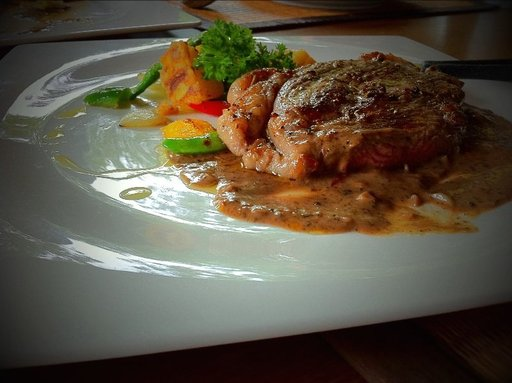

In [8]:
#viszlaing the images 
#get all of the images apths,
#2. picja random iamg epath using python's random.choice()
#.3 ge tthe iamge class name 

import random
from PIL import Image

# random.seed(42)
#get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

#pick a random iamge path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#get image clas from path name(the image class is the nameo fo thedir where the image is stored)
image_class = random_image_path.parent.stem
image_class

img = Image.open(random_image_path)
print(f"random iamge path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image heigh: {img.height}")
print(f"image wideth: {img.width}")
img


Text(0.5, 1.0, 'image class: steak | image shape: (383, 512, 3) -> [height, width, color channels]')

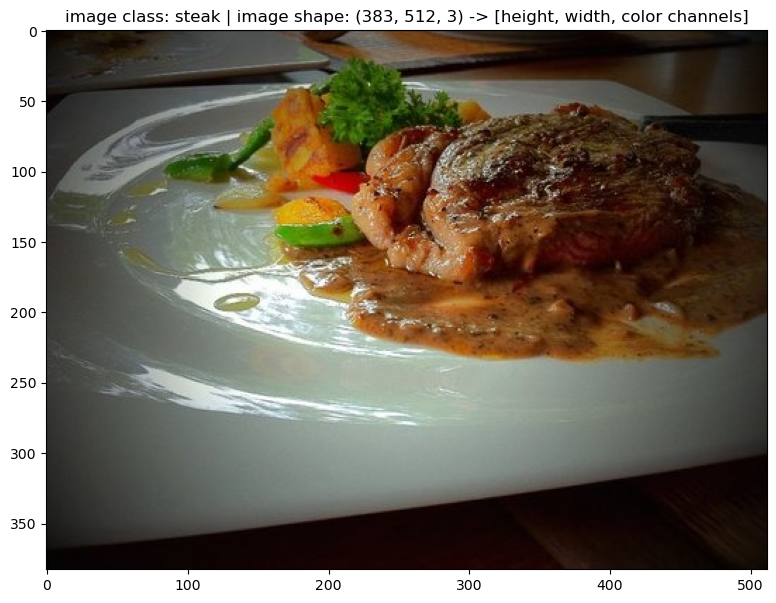

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#turn img into array
img_as_array = np.asanyarray(img)
img_as_array.shape
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} | image shape: {img_as_array.shape} -> [height, width, color channels]")
#here we have color chanlles last

In [10]:
img_as_array

array([[[ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  5],
        ...,
        [ 9, 11, 10],
        [ 8, 10,  9],
        [ 8, 10,  9]],

       [[ 6,  6,  8],
        [ 5,  5,  7],
        [ 5,  5,  5],
        ...,
        [12, 14, 13],
        [11, 13, 12],
        [11, 13, 12]],

       [[ 8,  6,  7],
        [ 8,  6,  7],
        [ 7,  5,  6],
        ...,
        [14, 16, 15],
        [13, 15, 14],
        [12, 14, 13]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  2,  3],
        ...,
        [14,  7,  1],
        [12,  7,  3],
        [11,  6,  2]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  2,  3],
        ...,
        [15,  8,  2],
        [12,  7,  3],
        [12,  7,  3]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  2,  3],
        ...,
        [14,  9,  5],
        [13,  8,  4],
        [13,  8,  4]]], dtype=uint8)

## transforming data into tensor

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
#transforming data using torchvision.transform
data_transform = transforms.Compose([
    #resizeour images to 64*64
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.0549, 0.0667, 0.0745,  ..., 0.1020, 0.0627, 0.0392],
         [0.0588, 0.0549, 0.0471,  ..., 0.1098, 0.0941, 0.0667],
         [0.0667, 0.0863, 0.0980,  ..., 0.1137, 0.1059, 0.0863],
         ...,
         [0.0863, 0.1020, 0.1098,  ..., 0.0627, 0.0627, 0.0549],
         [0.0784, 0.0902, 0.1059,  ..., 0.0275, 0.0275, 0.0196],
         [0.0667, 0.0824, 0.0824,  ..., 0.0275, 0.0235, 0.0196]],

        [[0.0588, 0.0706, 0.0784,  ..., 0.0627, 0.0353, 0.0235],
         [0.0510, 0.0510, 0.0392,  ..., 0.0902, 0.0667, 0.0431],
         [0.0549, 0.0706, 0.0863,  ..., 0.1059, 0.0941, 0.0706],
         ...,
         [0.0471, 0.0588, 0.0588,  ..., 0.0471, 0.0471, 0.0471],
         [0.0431, 0.0510, 0.0588,  ..., 0.0118, 0.0118, 0.0157],
         [0.0392, 0.0471, 0.0431,  ..., 0.0118, 0.0118, 0.0118]],

        [[0.0549, 0.0706, 0.0863,  ..., 0.0314, 0.0157, 0.0196],
         [0.0392, 0.0392, 0.0392,  ..., 0.0588, 0.0392, 0.0275],
         [0.0353, 0.0510, 0.0745,  ..., 0.0863, 0.0706, 0.

In [14]:
data_transform(img).dtype

torch.float32

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

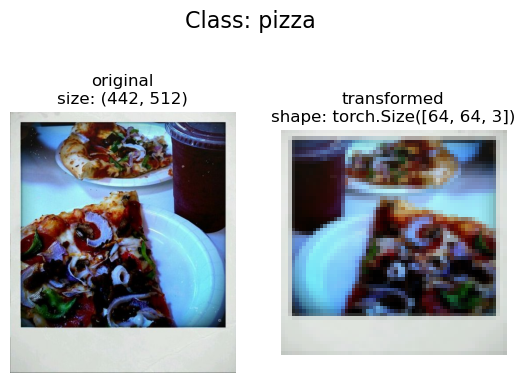

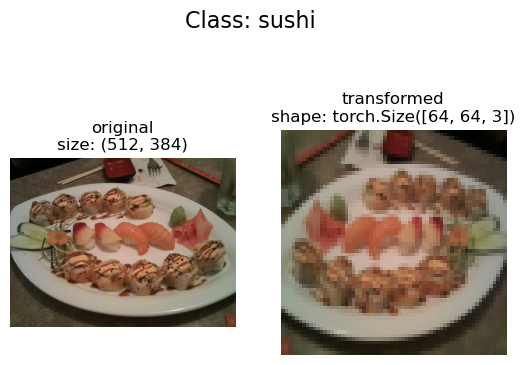

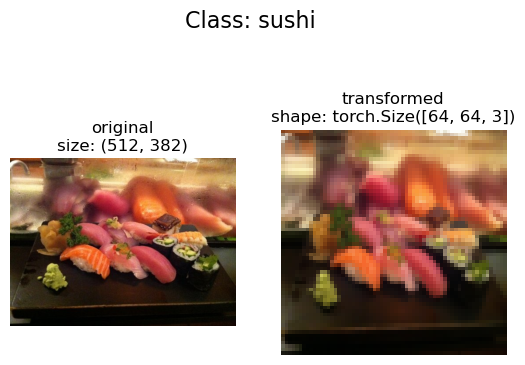

In [19]:
#we are gonna use transforms to help images get read to be used with a model/ data augmentation
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """Selects random images fromma ptoh of images and loads/ transofmr them and 
    plots the original and transformed version

    Args:
        image_path (_type_): _description_
        transform (_type_): _description_
        n (int, optional): _description_. Defaults to 3.
        seed (int, optional): _description_. Defaults to 42.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nsize: {f.size}")
            ax[0].axis(False)
            
            #transform and plot target iamge
            transformed_image = transform(f).permute(1,2,0) #from (c,h,w) to (h,w,c) #we need to change shape coz matplotlib prefers color channels first
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed\nshape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16) #to get class name from path
    
plot_transformed_images(image_paths=image_path_list, 
                        transform=data_transform,
                        n=3,
                        seed=None)
            

In [20]:
#option1 loading imge data using `imagefolder`
#we can load image classiciatino data uding `torchvision.datasts.ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for thedata
                                  target_transform=None, #transofmr for label/target
                                  )
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)   
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: dataset/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: dataset/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [21]:
#get clss names as a loist
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [23]:
#get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
len(train_data), len(test_data) 

(225, 75)

In [26]:
train_data.samples[0]


('dataset/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [28]:
#indix on the train data dataset to a et single img and a lebl
img, label = train_data[0]

In [29]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [30]:
label

0

In [39]:
img, label = train_data[0][0], train_data[0][1]
print(f"image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"imge datatype: {img.dtype}")
print(f"imge label:{label}")
print(f"labe dataype: {type(label)}")

image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [35]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [37]:
class_names[label]

'pizza'

original shape torch.Size([3, 64, 64])-> [color channels, height, width]
permuted shape torch.Size([64, 64, 3]) -> [heigh, wdith, color channels]


Text(0.5, 1.0, 'pizza')

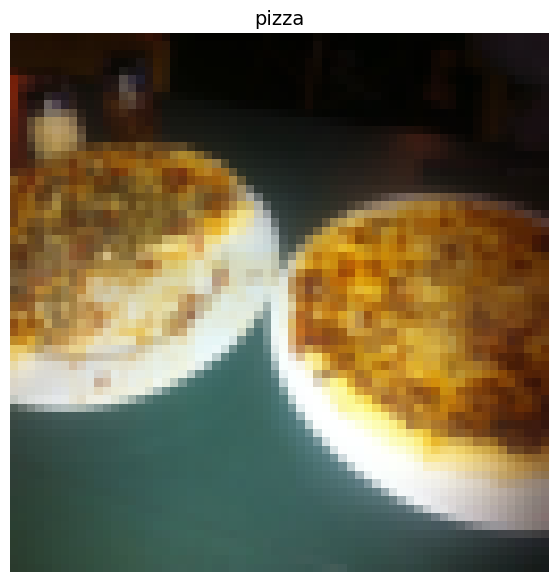

In [43]:
#rearrange th roder of dimensions to plot 
img_perumute = img.permute(1,2,0)

#print out differnet shapes
print(f"original shape {img.shape}-> [color channels, height, width]")
print(f"permuted shape {img_perumute.shape} -> [heigh, wdith, color channels]")

plt.figure(figsize=(10,7))
plt.axis(False)
plt.imshow(img_perumute)
plt.title(class_names[label], fontsize=14)


In [44]:
import os
os.cpu_count()

8

In [55]:
#creating a train_dataloader and a test_dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(), #number of cpu cores used 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f150016c110>,
 <torch.utils.data.dataloader.DataLoader at 0x7f150015a890>)

In [56]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [57]:
len(train_data), len(test_data)

(225, 75)

In [58]:
img, label = next(iter(train_dataloader))

#batch size is 1, you can change bactch size if uou like
print(f"imge shape :{img.shape} -> [batch_size, color channels, height, wdith]")
print(f"label shape: {label.shape}")

imge shape :torch.Size([1, 3, 64, 64]) -> [batch_size, color channels, height, wdith]
label shape: torch.Size([1])
